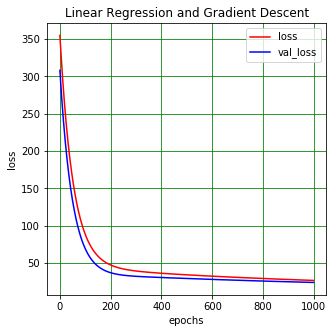

In [25]:
import os
os.chdir('D://dataset')
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

# 加载数据中的特征和标签
X, y = load_svmlight_file('housing_scale.txt')

# 分割测试集，验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 正态分布初始化参数
w = np.random.normal(size = (X.shape[1]))
b = np.random.normal(size = (1))

#其它参数初始化
y_ = np.zeros(1)
loss = np.zeros(1)
learning_rate = 0.002
epoch = 1000

# 记录训练集的loss随迭代次数的值
losses = []

# 记录验证集的loss随迭代次数的值
val_losses = []

# 计算loss
def validation(X_test, y_test, w, b):
    loss = 0
    for i in range(X_test.shape[0]):
        y_ = np.dot(X_test[i].data, w) + b
        loss += (y_test[i] - y_) * (y_test[i] - y_)* 0.5
    return loss/X_test.shape[0]

for num in range(epoch):
    # loss_function 对w，b的偏导
    G_w = 0
    G_b = 0
    
    # sigma求和
    for i in range(X_train.shape[0]):
        y_ = np.dot(X_train[i].data, w) + b
        loss += 1/2 * (y_train[i] - y_) * (y_train[i] - y_)
        G_w += (y_train[i] - y_) * (-X_train[i].data)
        G_b += y_ - y_train[i]
        
    # 求偏导的平均数
    loss /= X_train.shape[0]
    G_w /= X_train.shape[0]
    G_b /= X_train.shape[0]
    
    # 更新参数
    w = w - learning_rate * G_w
    b = b - learning_rate * G_b
    
    # 计算验证集loss
    val_loss = validation(X_test, y_test, w, b)
    
    # 将loss加入列表
    losses.append(loss[0])
    val_losses.append(val_loss[0])
    
    
#print(losses)#24.699624629666143
#print(val_losses)#24.003760056234494
    
# loss随迭代次数的变化图
plt.figure(figsize = (5, 5))
plt.plot(range(epoch), losses, label = "loss", color = 'red')  
plt.plot(range(epoch), val_losses, label = "val_loss", color = 'blue')  
plt.xlabel("epochs")  
plt.ylabel('loss')  
plt.legend()
plt.grid(True, color = 'g')
plt.title("Linear Regression and Gradient Descent")
plt.margins(0.05)
plt.show()